# NYC 311 Dataset

## Problem Definition and Modeling Objective

NYC 311 service requests provide a citywide record of non-emergency issues and the agencies responsible for resolving them. Understanding how resolution times vary across agencies, boroughs, and time can inform operational planning, resource allocation, and service performance evaluation.

In this analysis, we focus on modeling and explaining patterns in service resolution time using agency, borough, and temporal features. The objective is not only predictive accuracy, but also interpretability—identifying which factors are associated with longer or shorter resolution durations.


Boroughs - location of incidents
- 5 Boroughs in NYC
- Manhattan, Brooklyn, Queens, Bronx, Staten Island
- There are some unspecified locations of incidents in the dataset
- Where the incident physically occurred.

Agencies - the city department responsible for resolving the incident
- All part of NYC government 
- Completely separate departments with their own funding, staffing, operational procedures, areas of responsibility, and service level expectations

- 311 categorizes and routes to a correct agency

### NYC 311 Agencies

1. NYPD (New York City Police Department)
- General Role: Public safety, law enforcement, quality-of-life enforcement
- 311 responsibilities include: noise complaints, illegal parking, blocked driveways, graffiti, public drinking, disorderly conduct, traffic enforcement complaints, homeless encampments

2. HPD (Housing Preservation and Development)
- General Role: Protecting residential housing quality and enforcing housing codes
- 311 responsibilities include: no heat / no hot water, plumbing leaks, mold/mildew, rodents and pests inside dwellings, broken locks/doors/windows, illegal landlord behavior or property neglect, building-wide maintenance issues

3. DSNY (Department of Sanitation)
- General Role: Waste management and cleanliness
- 311 responsibilities include: missed garbage collection, improper disposal, overflowing trash bins, illegal dumping, dirty sidewalks or streets, dead animal removal, recycling issues

4. DOT (Department of Transportation)
- General Role: Street, traffic, and public roadway infrastructure management
- 311 responsibilities include: potholes, broken or missing street signs, damaged traffic signals, streetlight outages, sidewalk damage, wrong way signs/visibility issues

5. DEP (Department of Environmental Protection)
- General Role: Water, air, sewer, and environmental quality
- 311 responsibilities include: water main breaks, sewer backups, water discoloration/water quality issues, construction noise, air quality complaints, industrial fumes, water pressure issues

6. DOB (Department of Buildings)
- General Role: Building construction safety, code enforcement, and permits
- 311 responsibilities include: unsafe building conditions, illegal construction, structural concerns, scaffolding issues, elevators out of service, failure to maintain fire escapes

7. DPR (Department of Parks & Recreation)
- General Role: Public parks, trees, recreational facilities
- 311 responsibilities include: Dead tree/tree limb removal, damaged playground equipment, park maintenance issues, overgrown trees damaging property, public pool or recreation center issues

8. DOHMH (Department of Health and Mental Hygiene)
- General Role: Public health regulation and disease prevention
- 311 responsibilities include: rodents in public spaces, restaurant sanitary complaints, public health hazards, standing water, smoking complaints, hazardous materials

9. DHS (Department of Homeless Services)
- General Role: Homeless outreach, shelters, social services
- 311 responsibilities include: homeless encampment reports, people in need of social services, issues at shelters, quality-of-life concerns involving homeless individuals

10. DCWP (Department of Consumer and Worker Protection)
- General Role: Consumer rights, business regulation, workplace fairness
- 311 responsibilities include: price gouging, business licensing issues, consumer fraud, employment law violations, scams, predatory business practices

11. TLC (Taxi and Limousine Commission)
- General Role: Regulation of taxis, Ubers, Lyfts, for-hire vehicles
- 311 responsibilities include: unsafe taxi/Uber driving, fare disputes, taxi refusal, overcharging, dirty or unsafe vehicles, illegal for-hire activity

12. DOE (Department of Education)
- General Role: School facilities, maintenance, and safety
- 311 responsibilities include: school building heating issues, school cleanliness, school food safety, leaks/pests/facility requests

13. OTI (Office of Technology and Innovation)
- General Role: Citywide IT infrastructure
- 311 responsibilities include: website outages, city system technical problems, 311 app issues, access problems for digital services

14. OOS (Office of Operations (Mayor’s Office))
- General Role: Cross-agency operations, oversight, and coordination
- 311 responsibilities include: oversight-level complaints, issues requiring escalation, administrative or inter-agency matters

15. EDC (Economic Development Corporation)
- General Role: Economic growth, waterfront management, industrial support
- 311 responsibilities include: some waterfront complaints, business district issues, public-private development maintenance concerns

## The purpose of NYC 311 dataset

### 1. Operational decision-making
Identify which problems occur most often, when, and where, so the city can deploy staff more efficiently.
- incident numbers by boroughts/agencies 
 - incidents per capita per borough
 - agency load imbalance? 
- prediction of likelihood of each type of incidents by boroughs based on the frequencies of each type as well as by seasonal (is this enough with one year's data?)

### 2. Trend detection
Understand long-term patterns (seasonality, rising complaints, emerging issues).
- how to avg resolution time for incidents generally trend over weeks/months as well as for each incident type
- is seasonality predictable? Perhaps with 5 boroughs and multiple agencies it may yield a credible result
- emerging issues shown by trend of number of each type of incident

“With one year of data, we can identify intra-year seasonality (winter heat complaints, summer noise spikes, etc.). Multi-year trend detection is possible if we expand this project later.”

improvements - use moving averages to smooth trends, use year-over-year comparison is additional years are added later

### 3. Service performance evaluation
Measure how long different agencies take to resolve complaints.
- median/mean resolution time per agency
- median/mean resolution time per complaint type
- different in resolution speed across boroughs
- use distributions, not only averages
 - resolution time often have long right tails - extreme delays

### 4. Resource allocation
Decide which boroughs or agencies need more staffing or funding.
- depends on resolution time and number of incidents. analysis provided above

### 5. Predictive modeling (research + analytics)
Predict future incident volumes or resolution times to improve service planning.
- overall (with the whole dataset)
- by boroughs
- by agencies

# Exploratory Data Analysis (EDA)

## Data Scope and Initial Cleaning

The dataset is restricted to a complete calendar year (2025) to ensure temporal consistency and avoid partial-year bias. Records with missing or invalid timestamps are removed, and resolution time is computed as the difference between service request creation and closure times.

At this stage, cleaning focuses on ensuring that each record represents a valid, completed service request suitable for time-based analysis.

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [217]:
plt.rcParams["figure.figsize"] = (10, 5)

BASE_DIR = Path.cwd().parents[0]  # notebooks/ -> project root
CLEAN_PATH = BASE_DIR / "data" / "cleaned" / "nyc_311_full_year_cleaned.parquet"

df = pd.read_parquet(CLEAN_PATH)
df.shape

(3207336, 14)

In [ ]:
df.head(5)

,created_date,closed_date,complaint_type,descriptor,agency,borough,incident_zip,latitude,longitude,resolution_hours,month,hour,weekday,is_weekend
45506,2025-01-01 00:00:12,2025-01-02 17:05:54,Noise - Residential,Loud Music/Party,NYPD,BRONX,10466,40.89187241649303,-73.86016845296459,41.095001,1.0,0.0,2.0,0.0
45507,2025-01-01 00:00:13,2025-01-01 00:05:19,Noise - Residential,Loud Music/Party,NYPD,BROOKLYN,11211,40.71120965026345,-73.95897331500413,0.085000,1.0,0.0,2.0,0.0
45508,2025-01-01 00:00:17,2025-01-01 09:01:06,Noise - Residential,Loud Music/Party,NYPD,BRONX,10466,40.89187241649303,-73.86016845296459,9.013611,1.0,0.0,2.0,0.0
45509,2025-01-01 00:00:19,2025-01-01 00:43:08,Illegal Fireworks,N/A,NYPD,BROOKLYN,11230,40.62923998368745,-73.96879043074365,0.713611,1.0,0.0,2.0,0.0
45510,2025-01-01 00:00:34,2025-01-02 12:04:30,HEAT/HOT WATER,APARTMENT ONLY,HPD,BRONX,10466,40.89194007532644,-73.85277542800861,36.065556,1.0,0.0,2.0,0.0


In [212]:
# Remove df[latitude] and df[longitude] as they are not needed for modeling
df2 = df.drop(columns=["latitude", "longitude"])
df2.head(2)

,created_date,closed_date,complaint_type,descriptor,agency,borough,incident_zip,resolution_hours,month,hour,weekday,is_weekend
45506,2025-01-01 00:00:12,2025-01-02 17:05:54,Noise - Residential,Loud Music/Party,NYPD,BRONX,10466,41.095001,1.0,0.0,2.0,0.0
45507,2025-01-01 00:00:13,2025-01-01 00:05:19,Noise - Residential,Loud Music/Party,NYPD,BROOKLYN,11211,0.085000,1.0,0.0,2.0,0.0


In [91]:
# Returning the floats as integers for clean up 
df2['month'] = df2['month'].astype(int)
df2['hour'] = df2['hour'].astype(int)
df2['weekday'] = df2['weekday'].astype(int)
df2['is_weekend'] = df2['is_weekend'].astype(int)

In [213]:
# Successfully converted the columns to integer type
df2.head(5)

,created_date,closed_date,complaint_type,descriptor,agency,borough,incident_zip,resolution_hours,month,hour,weekday,is_weekend
45506,2025-01-01 00:00:12,2025-01-02 17:05:54,Noise - Residential,Loud Music/Party,NYPD,BRONX,10466,41.095001,1.0,0.0,2.0,0.0
45507,2025-01-01 00:00:13,2025-01-01 00:05:19,Noise - Residential,Loud Music/Party,NYPD,BROOKLYN,11211,0.085000,1.0,0.0,2.0,0.0
45508,2025-01-01 00:00:17,2025-01-01 09:01:06,Noise - Residential,Loud Music/Party,NYPD,BRONX,10466,9.013611,1.0,0.0,2.0,0.0
45509,2025-01-01 00:00:19,2025-01-01 00:43:08,Illegal Fireworks,N/A,NYPD,BROOKLYN,11230,0.713611,1.0,0.0,2.0,0.0
45510,2025-01-01 00:00:34,2025-01-02 12:04:30,HEAT/HOT WATER,APARTMENT ONLY,HPD,BRONX,10466,36.065556,1.0,0.0,2.0,0.0


## Feature Engineering for Temporal Patterns

To capture temporal variation in service requests and resolution behavior, additional time-based features are derived from the request creation timestamp. These include month, hour of day, weekday, and weekend indicators.

These features allow the analysis to examine seasonality, daily cycles, and behavioral differences between weekdays and weekends.

In [93]:
# Month values from 1 to 12 - 1: January, 2: February, ..., 12: December
df2['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [94]:
# Hour values from 0 to 23 - 0: 12 AM, 1: 1 AM, ..., 23: 11 PM
df2['hour'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23,  0,  1,  2,  3,  4])

In [ ]:
# Day of week. 0: Monday, 1: Tuesday, ..., 6: Sunday
df2['weekday'].unique()

array([4, 5, 6, 0, 1, 2, 3])

In [96]:
# 0 for False (not weekend), 1 for True (weekend)
df2['is_weekend'].unique()

array([0, 1])

In [97]:
df2['complaint_type'].unique()

array(['Illegal Parking', 'Blocked Driveway', 'HEAT/HOT WATER',
       'Building/Use', 'Noise - Residential', 'SAFETY',
       'Noise - Street/Sidewalk', 'GENERAL', 'APPLIANCE', 'PLUMBING',
       'UNSANITARY CONDITION', 'ELECTRIC',
       'Emergency Response Team (ERT)', 'Noise', 'Snow or Ice',
       'WATER LEAK', 'Noise - Commercial', 'Noise - Vehicle',
       'Water System', 'Street Condition', 'Derelict Vehicles',
       'Abandoned Vehicle', 'Street Light Condition',
       'Street Sign - Dangling', 'Rodent', 'Overgrown Tree/Branches',
       'PAINT/PLASTER', 'FLOORING/STAIRS', 'DOOR/WINDOW',
       'Traffic Signal Condition', 'Animal-Abuse',
       'Non-Emergency Police Matter', 'Vendor Enforcement',
       'Unsanitary Pigeon Condition', 'Residential Disposal Complaint',
       'Obstruction', 'General Construction/Plumbing', 'E-Scooter',
       'Unleashed Dog', 'Illegal Dumping', 'Dirty Condition',
       'Encampment', 'Dumpster Complaint', 'Traffic', 'Drug Activity',
       'Con

In [ ]:
# The total number of complaint types
df2['complaint_type'].nunique()

180

---

# Agency and Borough Filtering Strategy

The NYC 311 dataset contains a highly imbalanced distribution across agencies and boroughs. A small number of agencies account for the vast majority of reported incidents, while several others contribute only a negligible fraction of the data. Including categories with extremely low representation can introduce noise, unstable estimates, and unreliable model behavior, particularly for predictive tasks.

To address this, we examine the proportion of total incidents handled by each agency and borough and retain only those with sufficient data coverage. This filtering ensures that the model is trained on categories with enough observations to support meaningful pattern learning, while reducing sparsity and overfitting risks associated with rare categories.

The following visualization illustrates the long-tailed distribution of incident volume across agencies, motivating the decision to focus subsequent analysis and modeling on high-volume agencies and boroughs. All data preprocessing steps that follow apply this same consistency principle to both dimensions.

## Agency Distribution and Long-Tail Analysis

Before modeling, we examine how 311 incidents are distributed across responding agencies. This step determines whether all agencies provide sufficient data to support reliable statistical analysis.

By ranking agencies by incident volume and visualizing the distribution on a logarithmic scale, we identify a pronounced long-tail pattern. A small number of agencies account for the majority of service requests, while many others contribute only a negligible fraction.

In [218]:
# Create a table of agencies and their corresponding incident counts and percentages
agency_counts = df['agency'].value_counts()
total_incidents = agency_counts.sum()

# Display total incident count
print(f"\nIncident Counts: {total_incidents:,}\n")

agency_table = pd.DataFrame({
    "Agency": agency_counts.index,
    "Number of Incidents": agency_counts.values,
})

# Add percentage column
agency_table["Percentage"] = (agency_table["Number of Incidents"] / total_incidents) * 100

# Format number of incidents with commas
agency_table["Number of Incidents"] = agency_table["Number of Incidents"].map(lambda x: f"{x:,}")

# Format percentage to 2 decimal places
agency_table["Percentage"] = agency_table["Percentage"].map(lambda x: f"{x:.2f}%")

print("Top Agencies by Number of Incidents:\n")
print(agency_table.to_string(index=False))


Incident Counts: 3,207,336

Top Agencies by Number of Incidents:

Agency Number of Incidents Percentage
  NYPD           1,710,236     53.32%
   HPD             554,921     17.30%
  DSNY             310,102      9.67%
   DOT             189,489      5.91%
   DEP             187,732      5.85%
   DOB              73,574      2.29%
   DPR              62,877      1.96%
 DOHMH              53,127      1.66%
   DHS              42,782      1.33%
  DCWP              12,002      0.37%
   TLC               9,557      0.30%
   DOE                 681      0.02%
   OTI                 187      0.01%
   OOS                  67      0.00%
   EDC                   2      0.00%


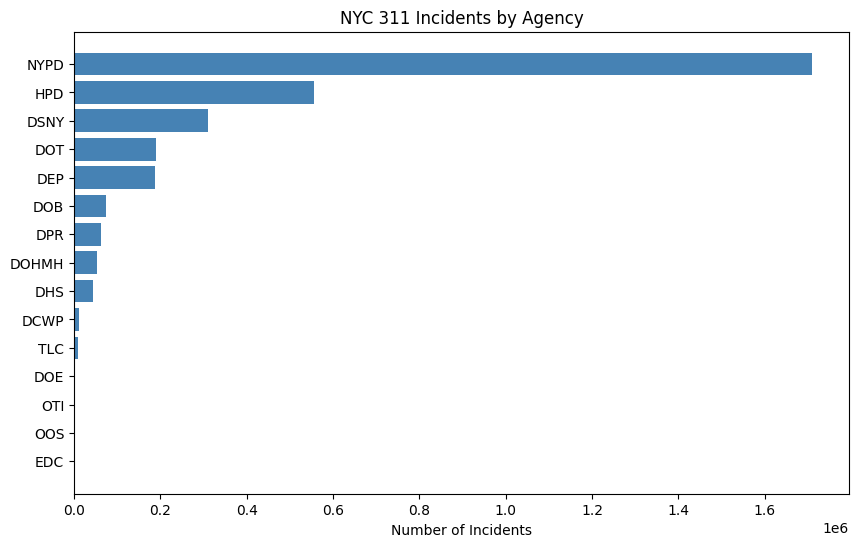

In [ ]:
# Visualize the distribution of incidents across agencies using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(agency_table["Agency"], 
         agency_counts.values, 
         color='steelblue')
plt.xlabel("Number of Incidents")
plt.title("NYC 311 Incidents by Agency")
plt.gca().invert_yaxis()  # because value_counts is descending
plt.show()

### Assessing Agency-Level Incident Concentration

Before filtering agencies for downstream analysis and modeling, we examine how 311 incidents are distributed across all responding agencies. This step helps determine whether incident volume is evenly spread or concentrated among a small subset of agencies. Understanding this distribution is critical, as agencies with very limited data may not provide sufficient statistical support for reliable trend analysis or predictive modeling.

To visualize this, agencies are ranked by total number of incidents handled, and the corresponding incident counts are plotted on a logarithmic scale. This ranking-based view highlights both dominant agencies and the relative scale of lower-volume agencies, making it easier to identify long-tail behavior and natural cutoffs for data inclusion.

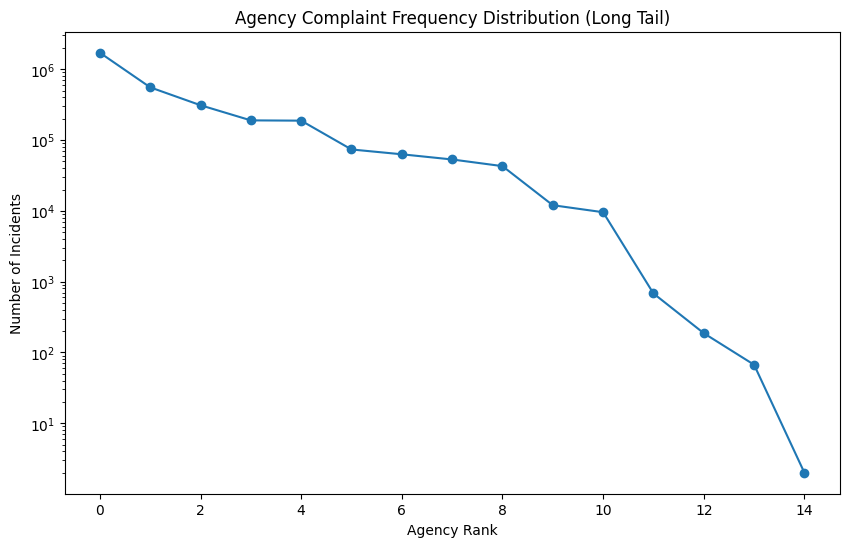

In [ ]:
# Visualize the long tail distribution of incidents across agencies using a line plot and log scale on the y-axis
agency_counts_sorted = agency_counts.sort_values(ascending=False).reset_index()
agency_counts_sorted.columns = ["Agency", "Count"]

plt.figure(figsize=(10,6))
plt.plot(agency_counts_sorted["Count"], marker="o")
plt.title("Agency Complaint Frequency Distribution (Long Tail)")
plt.xlabel("Agency Rank")
plt.ylabel("Number of Incidents")
plt.yscale("log")  # shows exponential drop clearly
plt.show()

The distribution of complaints across agencies follows a classic long-tail pattern: a very small number of agencies ranking 0 to 4 (NYPD, HPD, DSNY, DOT, and DEP) account for more than 92% of all 311 incidents, while the remaining agencies each contribute less than 3% individually and, in many cases, less than 0.1%. This extreme imbalance means that 1) lower-volume agencies lack the statistical density required to support reliable modeling or pattern detection and 2) their sparse data introduces noise and increases variance without meaningfully improving predictive power. By limiting the dataset to the top five agencies, we retain almost all of the actionable signal while removing categories that contribute disproportionately to noise. This improves model consistency, reduces sparsity, and allows the model to predict more accurately.

In [ ]:
# Conclusion - Remove data for agencies outside the top 5
top_agencies = agency_counts.head(5).index
df3 = df2[df2['agency'].isin(top_agencies)].reset_index(drop=True)
df3.shape

(2952480, 12)

In [220]:
# Counts after filtering (top 5 agencies)
agency_counts = df3["agency"].value_counts()

# Total incidents in original dataset (before filtering)
total_original = df2["agency"].value_counts().sum()

print(f"\nTotal Incidents (Original Dataset): {total_original:,}")

# Build table
agency_table = pd.DataFrame({
    "Agency": agency_counts.index,
    "Number of Incidents": agency_counts.values
})

# Percentage relative to ORIGINAL dataset
agency_table["Percentage"] = (agency_table["Number of Incidents"] / total_original) * 100

# Add TOTAL row (filtered subset)
filtered_total = agency_counts.sum()

total_row = pd.DataFrame({
    "Agency": ["TOTAL (Top 5 Only)"],
    "Number of Incidents": [filtered_total],
    "Percentage": [(filtered_total / total_original) * 100]
})

agency_table = pd.concat([agency_table, total_row], ignore_index=True)

# Format for display
agency_table["Number of Incidents"] = agency_table["Number of Incidents"].map(lambda x: f"{x:,}")
agency_table["Percentage"] = agency_table["Percentage"].map(lambda x: f"{x:.2f}%")

print("\nAgency Distribution (Relative to Original Dataset):\n")
print(agency_table.to_string(index=False))


Total Incidents (Original Dataset): 3,161,830

Agency Distribution (Relative to Original Dataset):

            Agency Number of Incidents Percentage
              NYPD           1,710,236     54.09%
               HPD             554,921     17.55%
              DSNY             310,102      9.81%
               DOT             189,489      5.99%
               DEP             187,732      5.94%
TOTAL (Top 5 Only)           2,952,480     93.38%


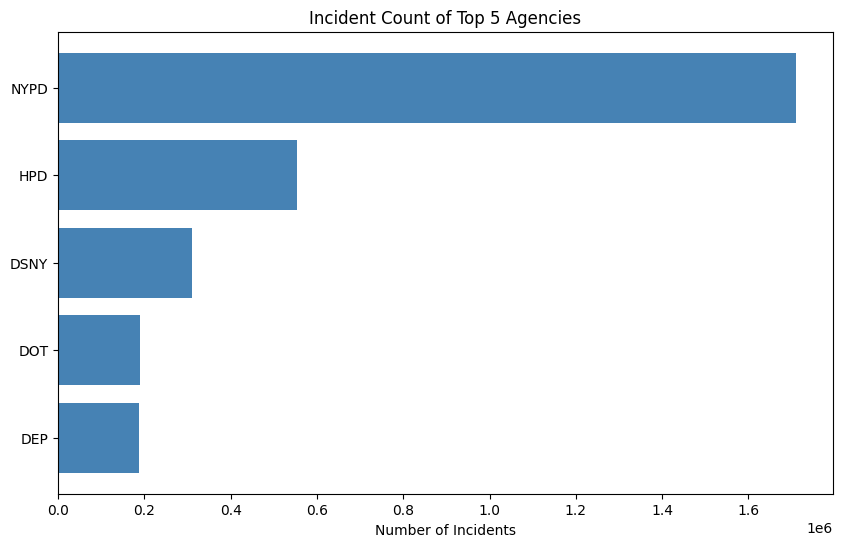

In [ ]:
# Visualize the distribution of incidents across the top 5 agencies
plt.figure(figsize=(10,6))
plt.barh(agency_counts.index, agency_counts.values, color="steelblue")
plt.xlabel("Number of Incidents")
plt.title("Incident Count of Top 5 Agencies")
plt.gca().invert_yaxis()
plt.show()

### Summary of Agency Filtering

The agency-level filtering process retains the five highest-volume agencies, which together account for 93.38% of all 311 incidents in the original dataset. Although this approach excludes a small number of lower-volume agencies, the resulting loss of data is minimal relative to the overall coverage. By focusing on agencies with substantial representation, the dataset becomes more statistically stable and less susceptible to noise introduced by sparsely populated categories. This improves model reliability, reduces variance in parameter estimates, and allows downstream analysis to focus on meaningful operational patterns in service resolution behavior.

---

## Borough Distribution and Threshold-Based Filtering

Unlike agencies, boroughs represent fixed geographic regions rather than operational units. Incident volume across boroughs is more evenly distributed, with four boroughs accounting for nearly all requests and Staten Island contributing a relatively small share.

Given this structure, a threshold-based approach is applied. Boroughs representing less than 5% of total incidents are excluded to ensure sufficient data coverage while maintaining geographic relevance.

In [204]:
# Count boroughs
borough_counts = df3["borough"].value_counts()

# Compute total
total = borough_counts.sum()

# Build table
borough_table = pd.DataFrame({
    "Borough": borough_counts.index,
    "Number of Incidents": borough_counts.values,
})

total_borough = borough_counts.sum()

print(f"\nBorough Counts: {total_borough:,}")

# Add percentage
borough_table["Percentage"] = (borough_table["Number of Incidents"] / total) * 100

# Format
borough_table["Number of Incidents"] = borough_table["Number of Incidents"].map(lambda x: f"{x:,}")
borough_table["Percentage"] = borough_table["Percentage"].map(lambda x: f"{x:.2f}%")

print("\nBorough Distribution:\n")
print(borough_table.to_string(index=False))


Borough Counts: 2,952,480

Borough Distribution:

      Borough Number of Incidents Percentage
     BROOKLYN             878,785     29.76%
       QUEENS             722,482     24.47%
        BRONX             712,280     24.12%
    MANHATTAN             531,777     18.01%
STATEN ISLAND             105,818      3.58%
  Unspecified               1,338      0.05%


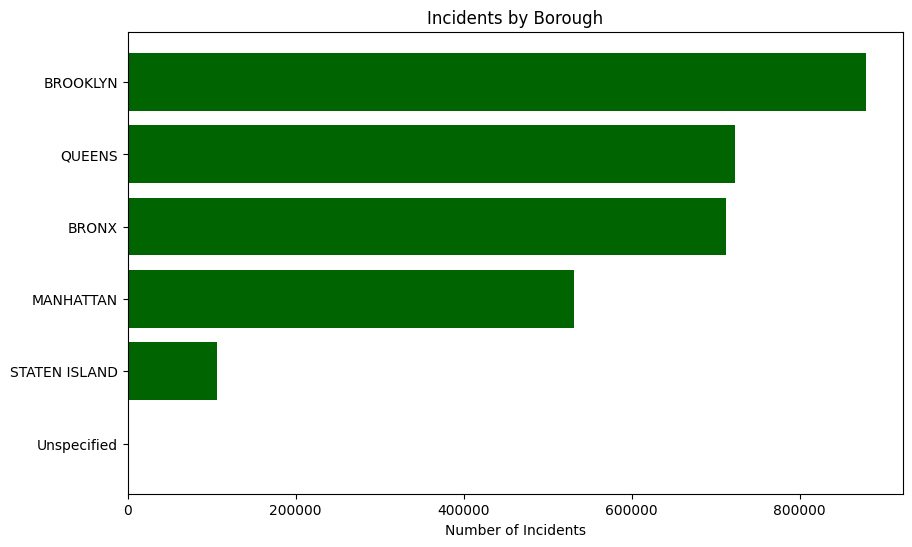

In [ ]:
# Visualize the distribution of incidents across boroughs
plt.figure(figsize=(10,6))
plt.barh(borough_counts.index, borough_counts.values, color='darkgreen')
plt.xlabel("Number of Incidents")
plt.title("Incidents by Borough")
plt.gca().invert_yaxis()
plt.show()

### Borough Filtering via Threshold-Based Selection

Unlike agencies, borough-level incident counts do not exhibit an extreme long-tail distribution. As shown in the figure above, the majority of 311 incidents are concentrated in four boroughs—Brooklyn, Queens, the Bronx, and Manhattan—while Staten Island contributes a substantially smaller share of total incidents, and a small number of records lack borough information altogether (“Unspecified”).

Given this structure, a threshold-based filtering approach is more appropriate for boroughs. We retain boroughs that account for at least 5% of total incidents, ensuring that each retained category has sufficient data volume to support stable statistical analysis and modeling. Under this criterion, the four major boroughs are preserved, while Staten Island and Unspecified entries are excluded due to their limited representation.

The 5% threshold is a commonly used heuristic in exploratory data analysis to balance data coverage and robustness: it is high enough to eliminate sparsely represented categories that may introduce noise or unstable estimates, yet low enough to preserve the vast majority of the dataset and maintain geographic relevance. Applying this threshold simplifies the dataset, improves statistical reliability, and allows subsequent analysis to focus on boroughs where patterns in incident volume and resolution behavior can be meaningfully detected.

In [154]:
threshold = 0.05  # 5%
valid_boroughs = borough_counts[borough_counts / total_borough >= threshold].index.tolist()

print("Boroughs kept:", valid_boroughs)

Boroughs kept: ['BROOKLYN', 'QUEENS', 'BRONX', 'MANHATTAN']


In [223]:
# Borough distribution AFTER borough filtering (df4)
borough_counts_kept = df4["borough"].value_counts()

# Total incidents in ORIGINAL dataset for this stage (before borough filtering)
# (Use df3 if df3 = agency-filtered but borough-unfiltered)
total_original = df3.shape[0]

print(f"\nTotal Incidents (Original Dataset): {total_original:,}")

# Build table for kept boroughs
borough_table = pd.DataFrame({
    "Borough": borough_counts_kept.index,
    "Number of Incidents": borough_counts_kept.values
})

# Percentages relative to ORIGINAL dataset
borough_table["Percentage"] = (borough_table["Number of Incidents"] / total_original) * 100

# Add TOTAL row for kept boroughs
kept_total = borough_counts_kept.sum()

total_row = pd.DataFrame({
    "Borough": ["TOTAL (Kept Boroughs Only)"],
    "Number of Incidents": [kept_total],
    "Percentage": [(kept_total / total_original) * 100]
})

borough_table = pd.concat([borough_table, total_row], ignore_index=True)

# Formatting for display
borough_table["Number of Incidents"] = borough_table["Number of Incidents"].map(lambda x: f"{x:,}")
borough_table["Percentage"] = borough_table["Percentage"].map(lambda x: f"{x:.2f}%")

print("\nBorough Distribution (Relative to Original Dataset):\n")
print(borough_table.to_string(index=False))


Total Incidents (Original Dataset): 2,952,480

Borough Distribution (Relative to Original Dataset):

                   Borough Number of Incidents Percentage
                  BROOKLYN             878,785     29.76%
                    QUEENS             722,482     24.47%
                     BRONX             712,280     24.12%
                 MANHATTAN             531,777     18.01%
TOTAL (Kept Boroughs Only)           2,845,324     96.37%


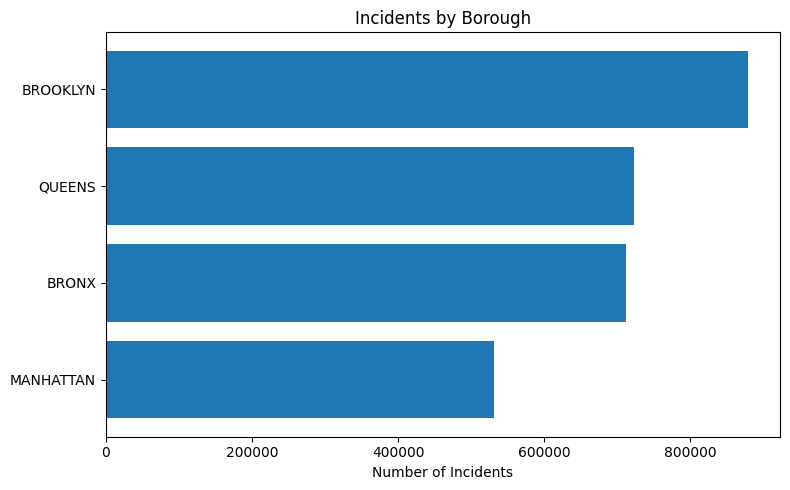

In [ ]:
# Visualize the distribution of incidents across boroughs after filtering
plt.figure(figsize=(8, 5))
plt.barh(borough_counts.index, borough_counts.values)
plt.xlabel("Number of Incidents")
plt.title("Incidents by Borough")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Justification for excluding Staten Island and Unspecified

Although boroughs are physical geographic units and all five boroughs are part of New York City, borough-level filtering is applied here strictly for predictive modeling stability, not to redefine the scope of NYC. The borough distribution shows that Brooklyn, Queens, the Bronx, and Manhattan collectively represent the overwhelming majority of incidents, while Staten Island contributes a relatively small fraction of the dataset and “Unspecified” does not correspond to a valid geographic location. Including very low-volume categories can lead to unstable estimates, noisier patterns, and weaker generalization because the model has insufficient examples to learn reliable relationships for those groups. For this reason, Staten Island and Unspecified entries are excluded from the modeling dataset to improve statistical robustness and reduce sparsity-driven noise. Importantly, this exclusion is a modeling choice rather than a conceptual claim about NYC; descriptive analysis can still report citywide distributions including Staten Island, while the predictive model focuses on boroughs with sufficient data density to support stable, interpretable learning.

### Removal of Staten Island and "Unspecified" borough

After filtering the dataset to include only the top five agencies with meaningful sample sizes, we examined borough distribution within this reduced dataset. At this stage, Staten Island and “Unspecified” borough entries accounted for a very small fraction of total incidents, which were far below the threshold needed to provide statistically reliable patterns. 
Including boroughs with extremely low sample sizes introduces instability into downstream modeling, especially for tasks such as predicting incident volume or estimating resolution time, where adequate representation is required for the model to learn meaningful trends. 
Additionally, “Unspecified” records do not contain actionable geographic information and therefore cannot contribute to spatial or operational insights. For these reasons, both categories were removed to ensure the model is trained on data that is sufficiently robust, interpretable, and operationally relevant.

### Removal of agencies and boroughs

The same guiding principle was applied consistently throughout our data refinement process: retain only categories with a large enough sample size to support stable modeling and meaningful interpretation. 
For agencies, data volume was heavily skewed, with only a handful of departments responsible for more than 90% of all incidents. Keeping only these high-volume agencies reduced noise and sharpened the model’s ability to learn operational patterns. When applying this principle to boroughs, the distribution was less extreme, but the same logic held—categories with insufficient representation (Staten Island and “Unspecified”) were removed because they could not provide reliable signals for modeling or evaluation. 
This approach ensures that the final dataset is both analytically strong and aligned with the real-world operational focus of NYC 311 services.

### Rationale for Differing Filtering Approaches: Agencies vs. Boroughs

The decision to apply different filtering strategies to agencies and boroughs is driven by the structural differences in how these dimensions function within the NYC 311 system and how incidents are distributed across them.

At the agency level, incident volume exhibits a classic long-tail distribution, where a small number of agencies handle the overwhelming majority of complaints, while many others contribute only a negligible fraction. This extreme imbalance makes logarithmic scaling and rank-based long-tail analysis particularly effective, as it reveals sharp drop-offs in incident volume and highlights natural cut points where agencies lack sufficient data density for reliable statistical modeling. In this context, long-tail analysis helps identify categories whose inclusion would disproportionately increase noise and variance without improving predictive power.

In contrast, boroughs represent fixed geographic regions rather than operational units with variable scopes. Each borough is inherently part of the citywide system, and incident volumes are more evenly distributed relative to agencies. As a result, borough-level data does not exhibit the same extreme long-tail behavior. Instead, a threshold-based approach is more appropriate, allowing us to retain boroughs that meet a minimum data volume requirement while carefully evaluating the impact of excluding categories with limited representation. This approach preserves geographic interpretability while ensuring sufficient statistical support for downstream analysis.

By tailoring the filtering strategy to the underlying structure of each dimension, we balance model stability, interpretability, and data representativeness. Long-tail analysis optimizes agency selection by focusing on operational significance, while threshold-based filtering for boroughs maintains geographic coherence without introducing unnecessary sparsity. Together, these complementary approaches improve data quality and model reliability while respecting the distinct roles agencies and boroughs play in the NYC 311 system.

## Analysis of resolution time by boroughs/agencies

Before modeling resolution time, we examine its distribution across agencies and time. Because resolution durations can be influenced by extreme cases (e.g., prolonged housing or infrastructure complaints), we compare mean and median resolution times to assess skewness and the impact of outliers.

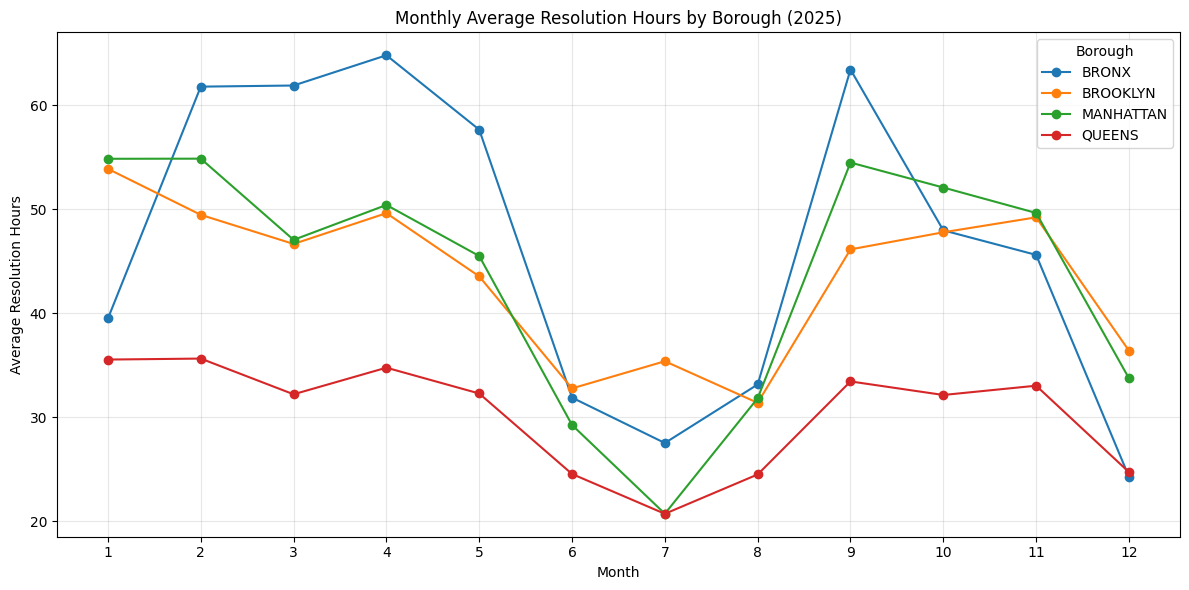

In [165]:
# Group by borough + month
borough_monthly = (
    df4.groupby(["borough", "month"])["resolution_hours"]
       .mean()
       .reset_index()
)

plt.figure(figsize=(12, 6))

for borough in borough_monthly["borough"].unique():
    subset = borough_monthly[borough_monthly["borough"] == borough]
    plt.plot(subset["month"], subset["resolution_hours"], marker='o', label=borough)

plt.title("Monthly Average Resolution Hours by Borough (2025)")
plt.xlabel("Month")
plt.ylabel("Average Resolution Hours")
plt.xticks(range(1, 13))
plt.legend(title="Borough")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


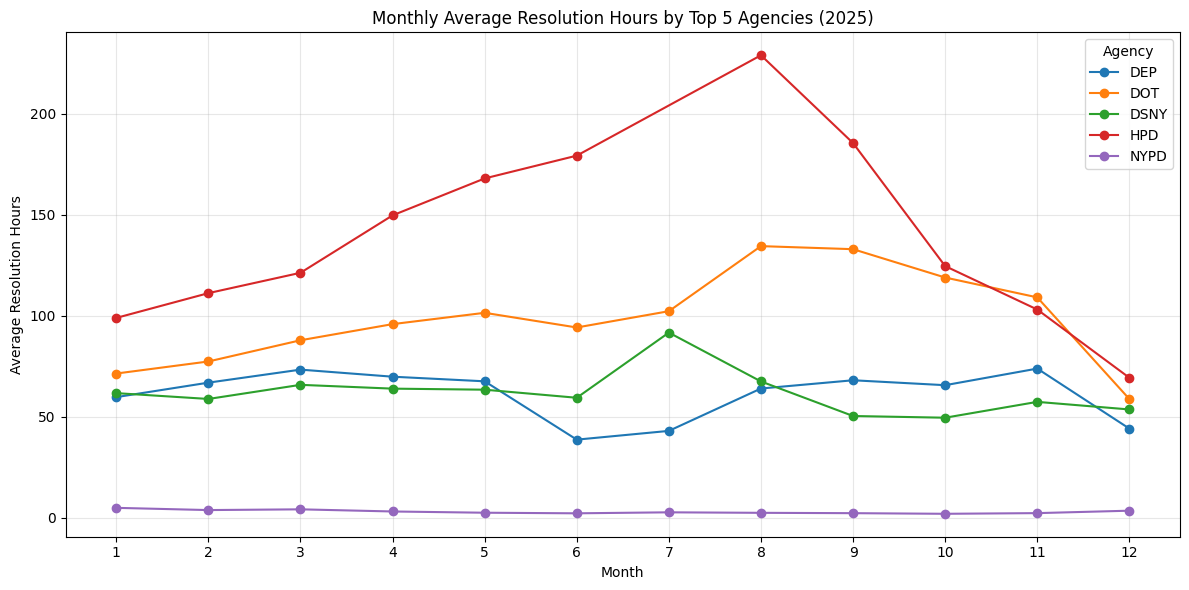

In [ ]:
# Visualize Monthly Average Resolution Hours by Agencies
top_agencies = ["NYPD", "HPD", "DSNY", "DOT", "DEP"]

agency_monthly = (
    df4[df4["agency"].isin(top_agencies)]
    .groupby(["agency", "month"])["resolution_hours"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))

for agency in agency_monthly["agency"].unique():
    subset = agency_monthly[agency_monthly["agency"] == agency]
    plt.plot(subset["month"], subset["resolution_hours"], marker='o', label=agency)

plt.title("Monthly Average Resolution Hours by Top 5 Agencies (2025)")
plt.xlabel("Month")
plt.ylabel("Average Resolution Hours")
plt.xticks(range(1, 13))
plt.legend(title="Agency")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


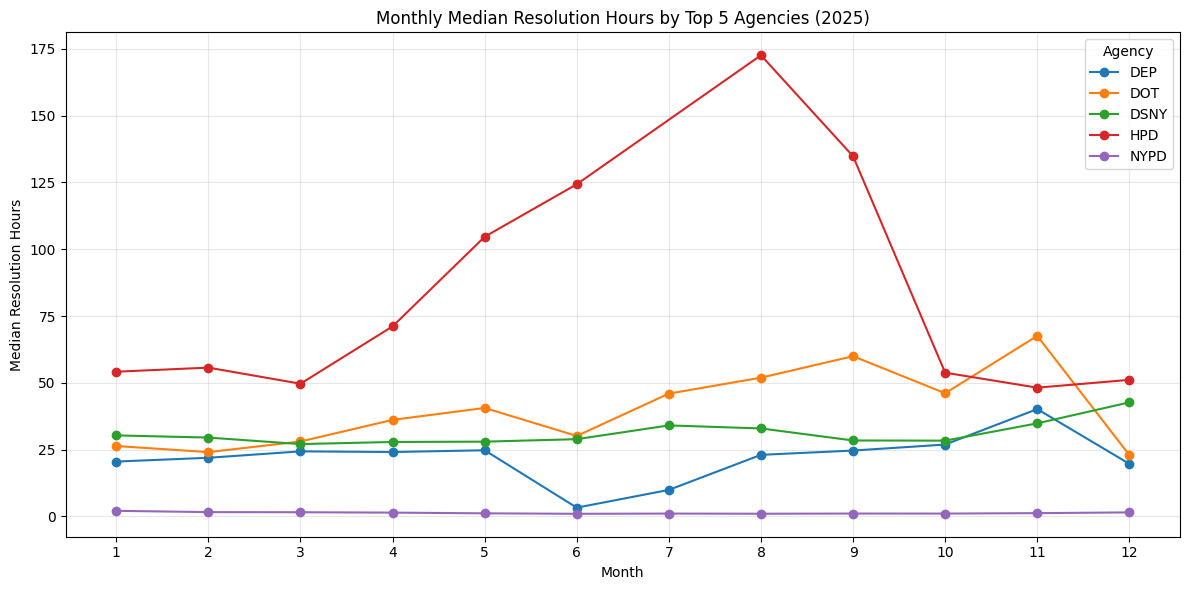

In [ ]:
agency_monthly_median = (
    df4.groupby(["agency", "month"])["resolution_hours"]
       .median()
       .reset_index()
)

plt.figure(figsize=(12, 6))

for agency in agency_monthly_median["agency"].unique():
    subset = agency_monthly_median[agency_monthly_median["agency"] == agency]
    plt.plot(
        subset["month"],
        subset["resolution_hours"],
        marker="o",
        label=agency
    )

plt.title("Monthly Median Resolution Hours by Top 5 Agencies (2025)")
plt.xlabel("Month")
plt.ylabel("Median Resolution Hours")
plt.xticks(range(1, 13))
plt.legend(title="Agency")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

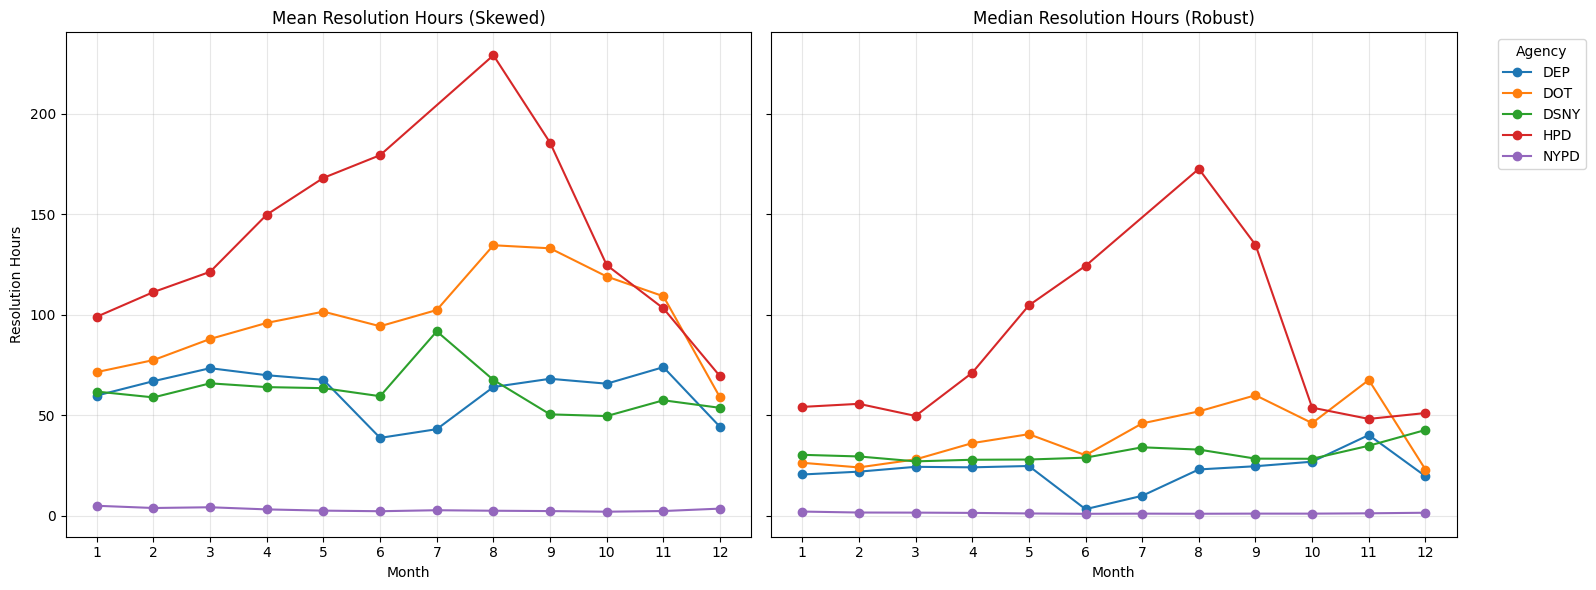

In [ ]:
# Visualize Mean and Median Resolution Hours by Agencies
agency_monthly_mean = (
    df4.groupby(["agency", "month"])["resolution_hours"]
       .mean()
       .reset_index()
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Mean plot
for agency in agency_monthly_mean["agency"].unique():
    subset = agency_monthly_mean[agency_monthly_mean["agency"] == agency]
    axes[0].plot(subset["month"], subset["resolution_hours"], marker="o", label=agency)

axes[0].set_title("Mean Resolution Hours (Skewed)")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Resolution Hours")
axes[0].set_xticks(range(1, 13))
axes[0].grid(True, alpha=0.3)

# Median plot
for agency in agency_monthly_median["agency"].unique():
    subset = agency_monthly_median[agency_monthly_median["agency"] == agency]
    axes[1].plot(subset["month"], subset["resolution_hours"], marker="o", label=agency)

axes[1].set_title("Median Resolution Hours (Robust)")
axes[1].set_xlabel("Month")
axes[1].set_xticks(range(1, 13))
axes[1].grid(True, alpha=0.3)

axes[1].legend(title="Agency", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

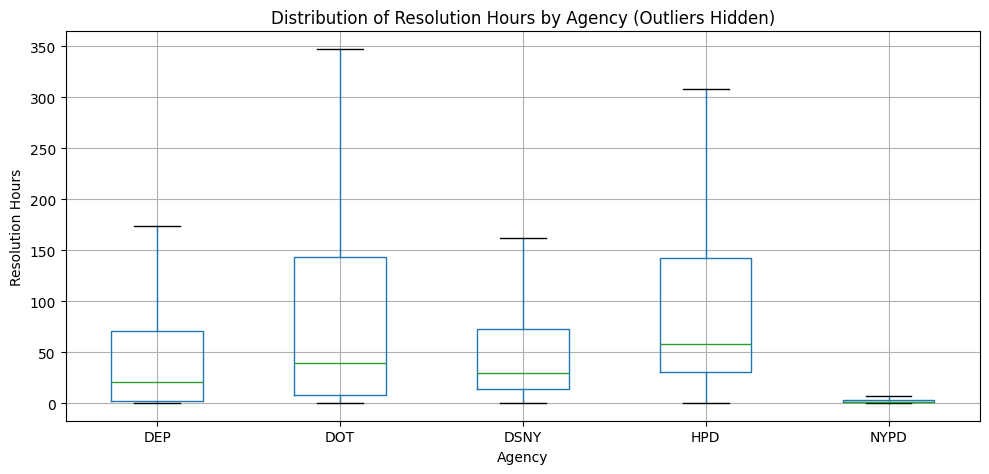

In [174]:
plt.figure(figsize=(10, 6))

df4.boxplot(
    column="resolution_hours",
    by="agency",
    showfliers=False
)

plt.title("Distribution of Resolution Hours by Agency (Outliers Hidden)")
plt.suptitle("")
plt.xlabel("Agency")
plt.ylabel("Resolution Hours")
plt.tight_layout()
plt.show()


In [176]:
# Attempt to remove outliers by putting a cap on 99th quartile
cap = df4["resolution_hours"].quantile(0.99)
df_capped = df4[df4["resolution_hours"] <= cap].copy()

print("99th percentile cap (hours):", round(cap, 2))

99th percentile cap (hours): 521.18


In [178]:
# Compute 99th percentile cap
cap_99 = df4["resolution_hours"].quantile(0.99)
print(f"99th percentile resolution_hours cap: {cap_99:.2f} hours")

# Apply cap
df4_capped = df4[df4["resolution_hours"] <= cap_99].copy()

print("Rows before capping:", len(df4))
print("Rows after capping :", len(df4_capped))

99th percentile resolution_hours cap: 521.18 hours
Rows before capping: 2845324
Rows after capping : 2816870


In [188]:
agency_monthly_stats = (
    df4_capped
    .groupby(["agency", "month"])["resolution_hours"]
    .agg(mean="mean", median="median")
    .reset_index()
)

agency_monthly_stats.head()

,agency,month,mean,median
0,DEP,1,52.937286,20.166666
1,DEP,2,57.973385,21.441666
2,DEP,3,65.242569,23.916666
3,DEP,4,64.416069,23.866667
4,DEP,5,61.183502,24.466667


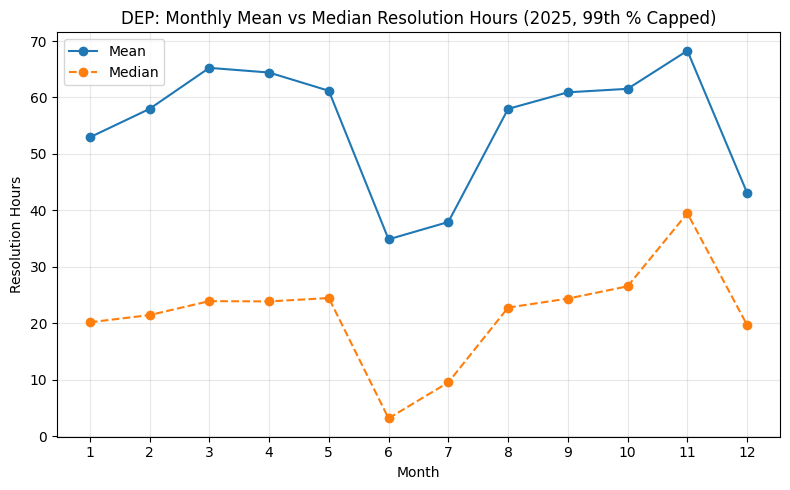

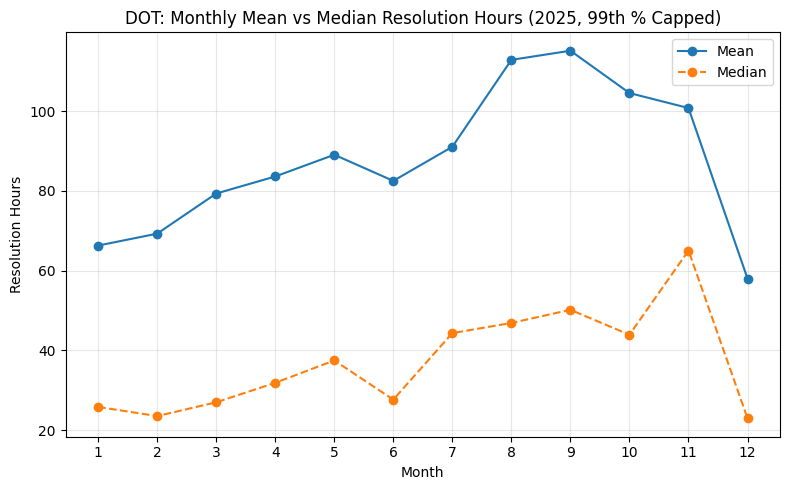

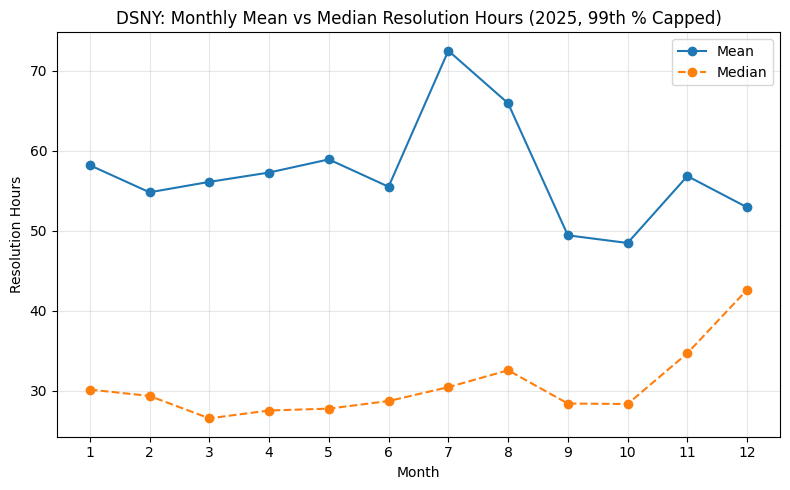

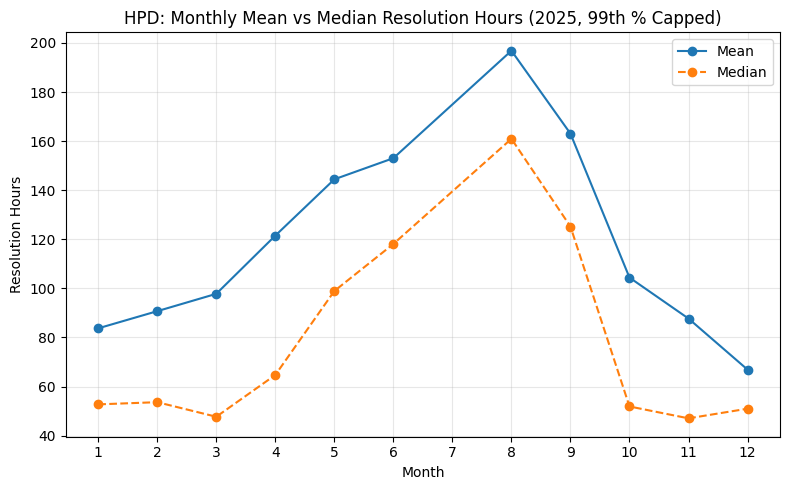

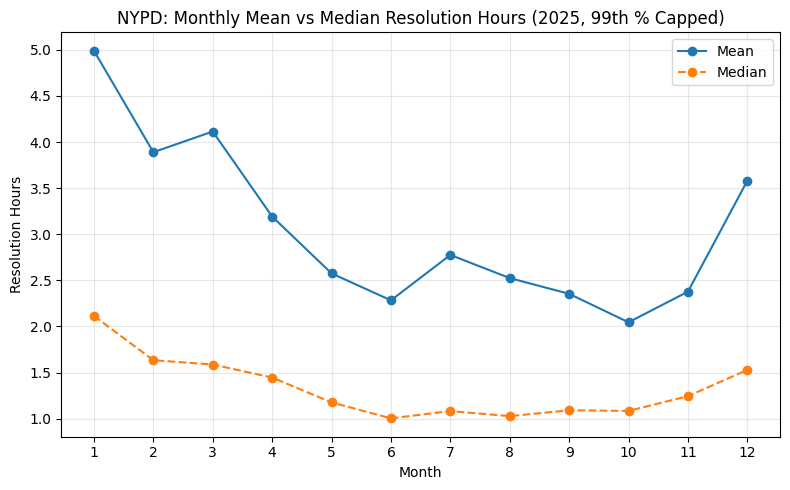

In [ ]:
# Ensure agencies are sorted consistently
agencies = sorted(agency_monthly_stats["agency"].unique())

for agency in agencies:
    subset = agency_monthly_stats[agency_monthly_stats["agency"] == agency]

    plt.figure(figsize=(8, 5))
    
    plt.plot(
        subset["month"],
        subset["mean"],
        marker="o",
        linestyle="-",
        label="Mean"
    )
    
    plt.plot(
        subset["month"],
        subset["median"],
        marker="o",
        linestyle="--",
        label="Median"
    )

    plt.title(f"{agency}: Monthly Mean vs Median Resolution Hours (2025, 99th % Capped)")
    plt.xlabel("Month")
    plt.ylabel("Resolution Hours")
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

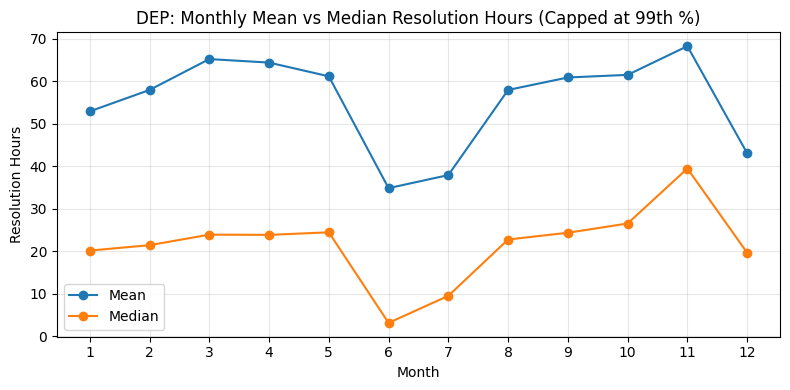

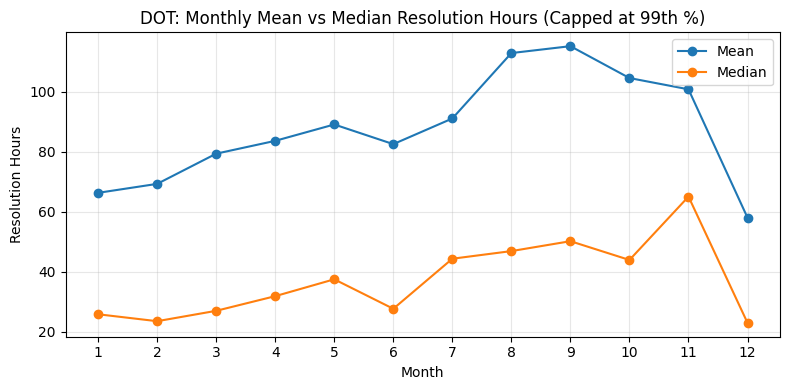

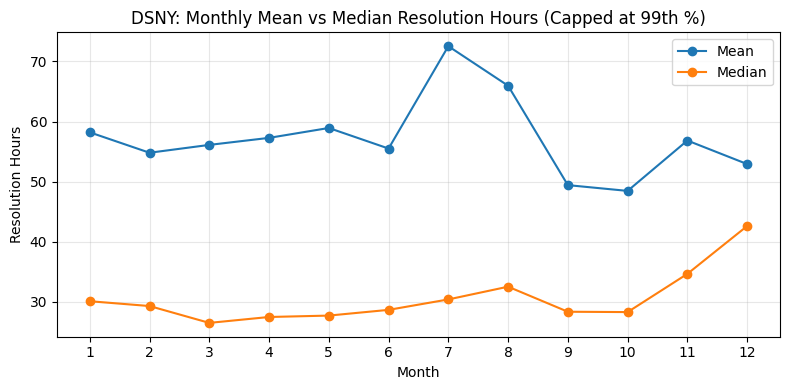

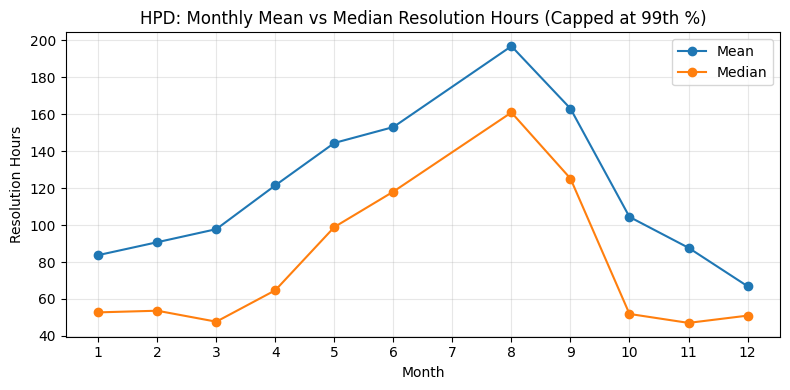

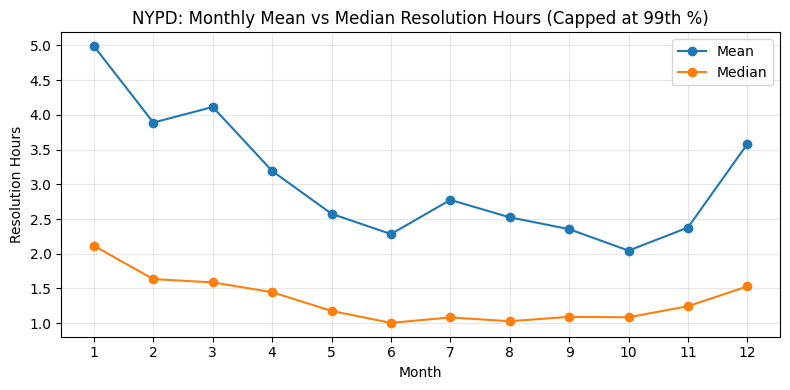

In [184]:
import matplotlib.pyplot as plt

agencies = agency_monthly_stats["agency"].unique()

for agency in agencies:
    subset = agency_monthly_stats[agency_monthly_stats["agency"] == agency]

    plt.figure(figsize=(8, 4))
    plt.plot(subset["month"], subset["mean"], label="Mean", marker="o")
    plt.plot(subset["month"], subset["median"], label="Median", marker="o")

    plt.title(f"{agency}: Monthly Mean vs Median Resolution Hours (Capped at 99th %)")
    plt.xlabel("Month")
    plt.ylabel("Resolution Hours")
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Goal:
To understand and predict patterns in 311 service resolution time across agencies and boroughs using temporal and categorical features.

Target variable: resolution_hours

Prediction task:
Estimate expected resolution duration (or typical resolution behavior) given:

- agency
- borough
- time of year
- time of day / weekday